**DATA PREPROCESSING**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import io
%matplotlib inline
sns.set_style('whitegrid')

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/kevinasyraf/find-it-2020-dac/master/hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
data.shape

(119390, 32)

In [ ]:
# check the data type of each attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# check missing data
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

From the missing data, it is necessary to make observations to fill in the data.
In agent attribute, can be filled with 0.
There is a lot of missing data in the company attribute, so it's okay to delete this column.
The country attribute can be filled with Unknown because the country of origin is unknown.
In the children attribute, we can fill in null children data with the number 0

In [ ]:
data = data.drop('company',axis=1)

In [ ]:
data = data.fillna({
    'children' : 0,
    'agent' : 0,
    'country' : 'Unknown',
})

In [ ]:
# Ensure no data is lost
any(data.isna().sum())

False

In [ ]:
# During the observation of the data, we find out which rows are which
# adult = 0, children = 0, and babies = 0. Then the row that contains data
# like this should be dropped because it's impossible to have a hotel booked
# with zero number of guests

zero_guests = list(data.loc[data['adults']
                            + data['children']
                            + data['babies'] == 0].index)
data.drop(data.index[zero_guests], inplace = True)

In [ ]:
data.shape

(119210, 31)

**EDA**
There will be several questions that will be answered in this EDA

**1.Detect Outliers**

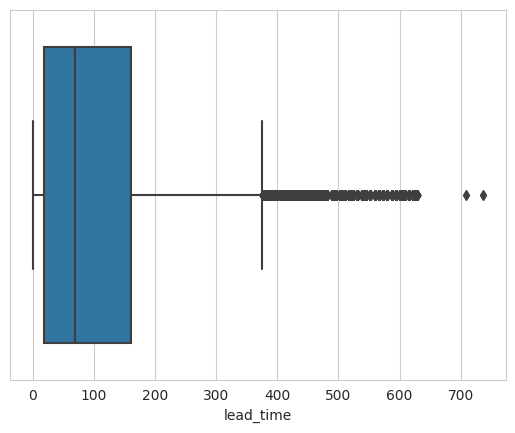

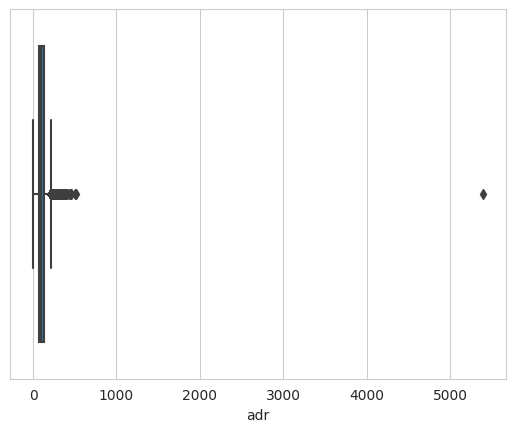

In [ ]:
sns.boxplot(data=data, x = 'lead_time')
plt.show()

sns.boxplot(data=data, x = 'adr')
plt.show()

In [ ]:

IQR_lt = data['lead_time'].quantile(0.75) -  data['lead_time'].quantile(0.25)
RUB = data['lead_time'].quantile(0.75) + 1.5*IQR_lt

data_no_outlier = data[data['lead_time'] <= RUB]

In [ ]:
IQR_adr = data['adr'].quantile(0.75) -  data['adr'].quantile(0.25)
RUB = data['adr'].quantile(0.75) + 1.5*IQR_adr

data_no_outlier = data_no_outlier[data_no_outlier['adr'] <= RUB]


**2. What countries are the guests from?**

In [ ]:
data_country = pd.DataFrame(data.loc[data['is_canceled'] != 1]['country'].value_counts())
data_country.index.name = 'country'
data_country.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = data_country["Number of Guests"].sum()
data_country["Guests in %"] = round(data_country["Number of Guests"] / total_guests * 100, 2)
data_country.head(10) # 10 countries with the most number of guests

,Number of Guests,Guests in %
country,,
PRT,20977,27.97
GBR,9668,12.89
FRA,8468,11.29
ESP,6383,8.51
DEU,6067,8.09
IRL,2542,3.39
ITA,2428,3.24
BEL,1868,2.49
NLD,1716,2.29


From the country data above, Portugal dominates for the country of origin of guests at the hotel.

In [ ]:
import plotly.express as px
guest_map = px.choropleth(data_country,
                    locations=data_country.index,
                    color=data_country["Guests in %"],
                    hover_name=data_country.index,
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title="Country of origin of hotel guests")
guest_map.show()

Based on the data visualization above. This hotel has been visited by tourists from almost all countries. A country colored white means that no tourists from that country have ever visited the hotel.
Many European countries visit this hotel.

**3. Number of guests per month by hotel each year**

In [ ]:
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
guest_data = data[data['is_canceled'] == 0].copy()
guests_monthly = guest_data[['hotel', 'arrival_date_year', 'arrival_date_month', 'adults', 'children', 'babies']].sort_values('arrival_date_year')
guests_monthly['total visitors'] = guests_monthly['adults'] + guests_monthly['children'] + guests_monthly['babies']
guests_monthly = guests_monthly.astype({'total visitors' : int})
guests_monthly = guests_monthly.drop(['adults', 'children', 'babies'], axis=1)
guests_monthly.head()

,hotel,arrival_date_year,arrival_date_month,total visitors
0,Resort Hotel,2015,July,2
43256,City Hotel,2015,September,2
43257,City Hotel,2015,September,2
43258,City Hotel,2015,September,2
43259,City Hotel,2015,September,2


<ipython-input-22-210085b1ea42>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


<ipython-input-22-210085b1ea42>:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


<ipython-input-22-210085b1ea42>:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




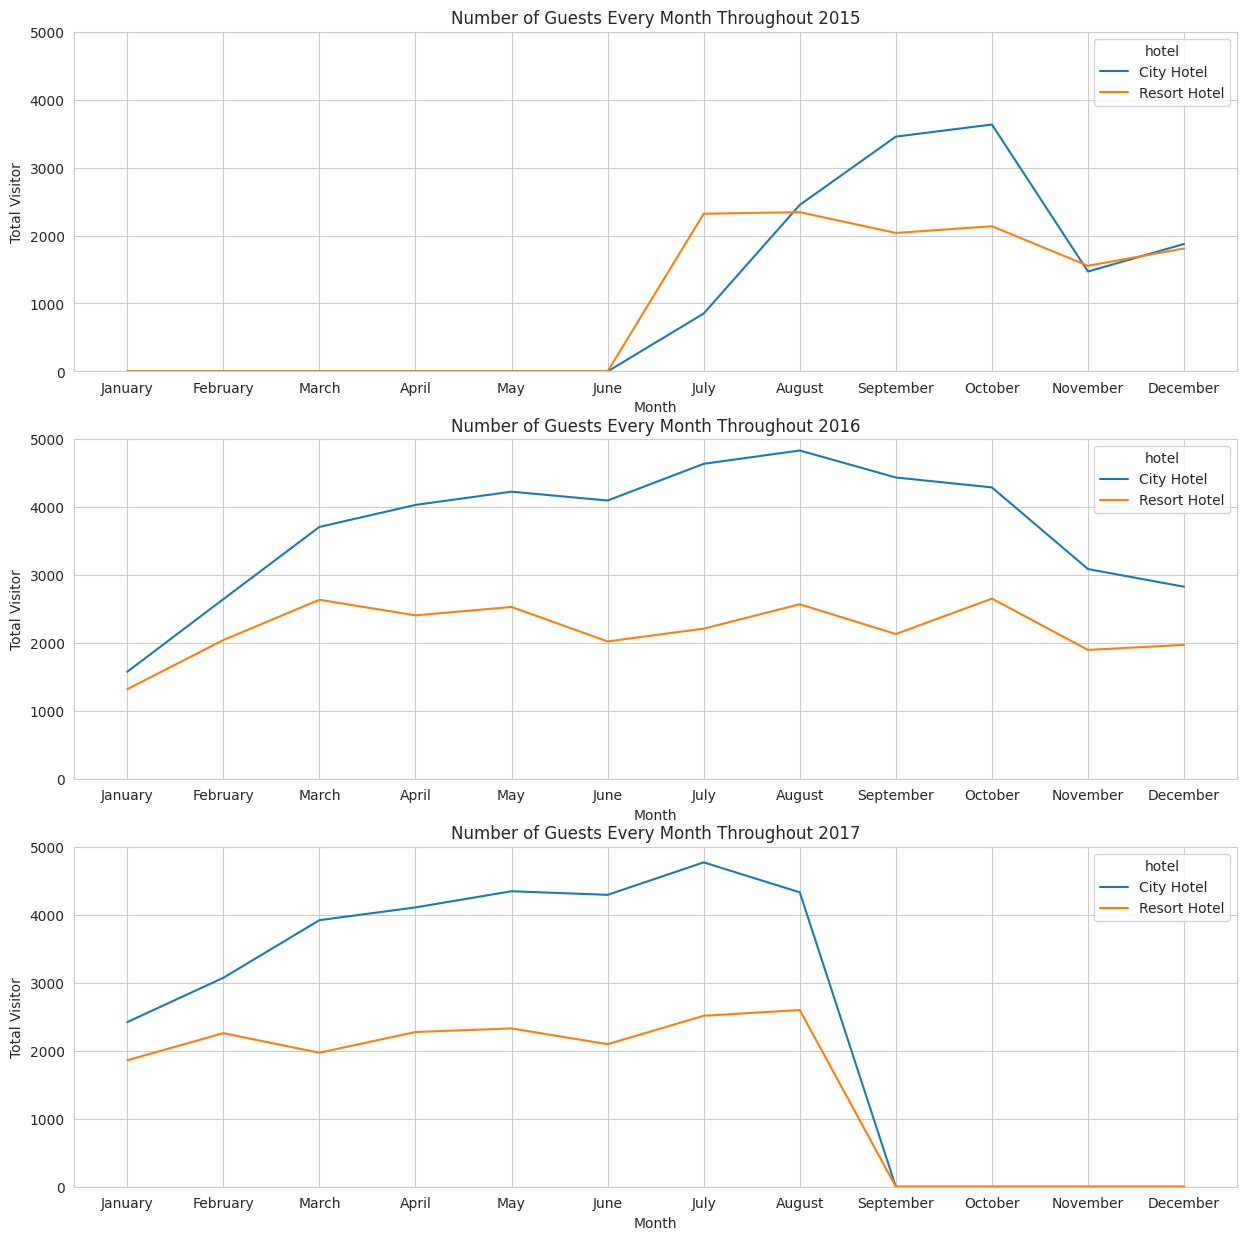

In [ ]:
guests_monthly['arrival_date_month'] = pd.Categorical(guests_monthly['arrival_date_month'], categories=months, ordered=True)
guests_monthly = guests_monthly.groupby(['hotel', 'arrival_date_year', 'arrival_date_month'], as_index = False).sum()

f, ax = plt.subplots(3,1,figsize=(15,15))
sns.lineplot(x = 'arrival_date_month', y="total visitors", hue="hotel", data=guests_monthly[guests_monthly['arrival_date_year'] == 2015],  ci="sd", ax=ax[0])
sns.lineplot(x = 'arrival_date_month', y="total visitors", hue="hotel", data=guests_monthly[guests_monthly['arrival_date_year'] == 2016],  ci="sd", ax=ax[1])
sns.lineplot(x = 'arrival_date_month', y="total visitors", hue="hotel", data=guests_monthly[guests_monthly['arrival_date_year'] == 2017],  ci="sd", ax=ax[2])

ax[0].set(title="Number of Guests Every Month Throughout 2015")
ax[0].set(xlabel="Month", ylabel="Total Visitor")
ax[0].set(ylim = (0,5000))

ax[1].set(title="Number of Guests Every Month Throughout 2016")
ax[1].set(xlabel="Month", ylabel="Total Visitor")
ax[1].set(ylim = (0,5000))

ax[2].set(title="Number of Guests Every Month Throughout 2017")
ax[2].set(xlabel="Month", ylabel="Total Visitor")
ax[2].set(ylim = (0,5000))

plt.show()


**4. The total price paid is based on the type of room per night**

In [ ]:
# Sharing data based on hotels (Resort Hotels and City Hotels) that are not canceled
rh = data_no_outlier[(data_no_outlier['hotel'] == 'Resort Hotel') & (data_no_outlier['is_canceled'] == 0)]
ch = data_no_outlier[(data_no_outlier['hotel'] != 'Resort Hotel') & (data_no_outlier['is_canceled'] == 0)]


In [ ]:
# calculate ADR (Average Daily Rate) for individuals (except for babies)
rh['adr_pp'] = rh['adr'] / (rh['adults'] + rh['children'])
ch['adr_pp'] = ch['adr'] / (ch['adults'] + ch['children'])


<ipython-input-24-71208ec7d416>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-71208ec7d416>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Since this hotel has a lot of visitors from Portugal, it is likely that the currency used is Euro €.

In [ ]:
print(f"""
     The average price paid per person per night is:
     Resort Hotel: {rh['adr_pp'].mean():.2f} €
     City Hotel: {ch['adr_pp'].mean():.2f} €"""
     )


     The average price paid per person per night is:
     Resort Hotel: 44.50 €
     City Hotel: 58.82 €


In [ ]:
full_data_guests = data.copy()
full_data_guests = full_data_guests.loc[full_data_guests['is_canceled'] == 0]
full_data_guests['adr_pp'] = full_data_guests['adr'] / (full_data_guests['adults'] + full_data_guests['children'])
room_prices = full_data_guests[['hotel', 'reserved_room_type', 'adr_pp']].sort_values("reserved_room_type")

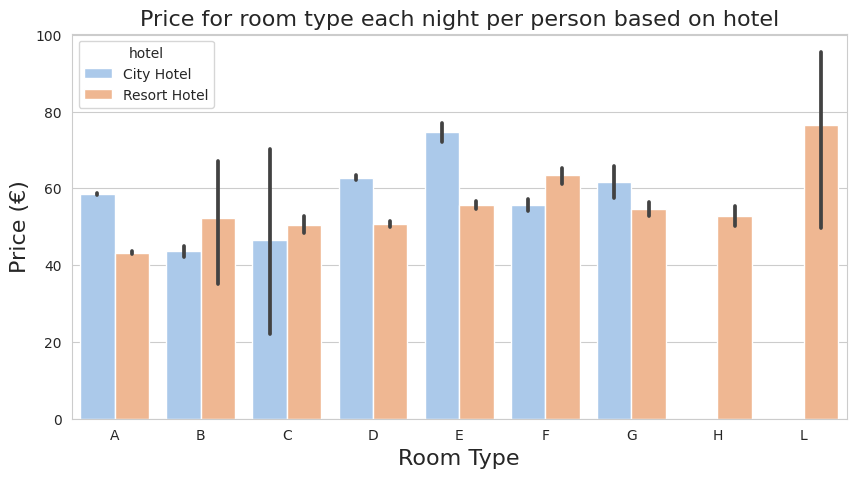

In [ ]:
plt. figure(figsize=(10,5))
sns.barplot(x='reserved_room_type', y='adr_pp', hue='hotel', data=room_prices, hue_order=['City Hotel', 'Resort Hotel'], palette='pastel')
plt.title('Price for room type each night per person based on hotel', fontsize=16)
plt.xlabel('Room Type', fontsize = 16)
plt.ylabel('Price (€)', fontsize = 16)
plt. show()

**5. Most Booked Room Types**

In [ ]:
print('Frequency of bookings for each type of room at CITY HOTEL')
print(data[(data['hotel'] == 'City Hotel')]['reserved_room_type'].value_counts())
print()
print('Frequency of bookings for each type of room at RESORT HOTEL')
print(data[data['hotel'] != 'City Hotel']['reserved_room_type'].value_counts())

Frequency of bookings for each type of room at CITY HOTEL
A    62484
D    11747
F     1788
E     1537
B     1112
G      482
C       13
Name: reserved_room_type, dtype: int64

Frequency of bookings for each type of room at RESORT HOTEL
A    23389
D     7432
E     4982
G     1610
F     1106
C      918
H      601
L        6
B        3
Name: reserved_room_type, dtype: int64


<Axes: xlabel='reserved_room_type', ylabel='count'>

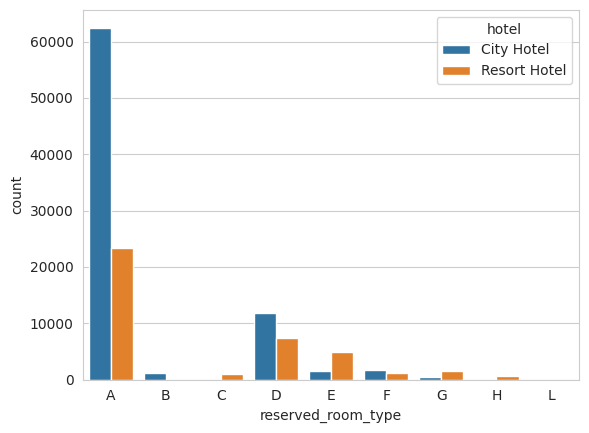

In [ ]:
sns.countplot(x = 'reserved_room_type', data = data.sort_values('reserved_room_type'), hue='hotel')


**6. Market segment comparison by hotel**

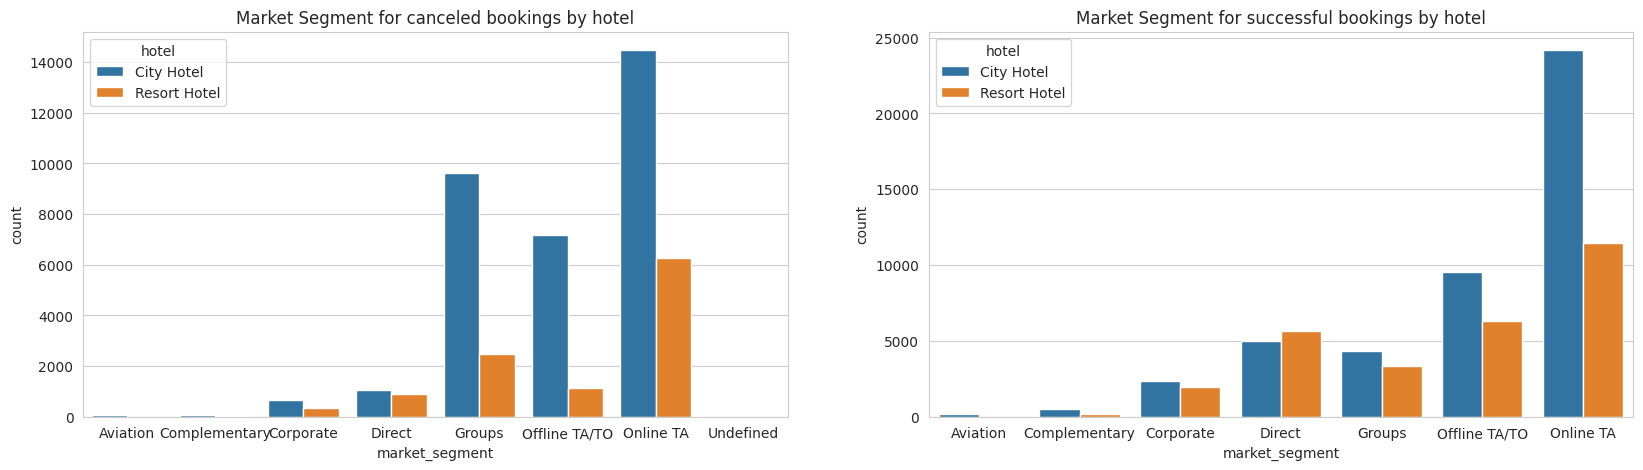

In [ ]:
data_canceled = data[data['is_canceled'] == 1].sort_values('market_segment')
data_not_canceled = data[data['is_canceled'] == 0].sort_values('market_segment')
f, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(data=data_canceled, x= 'market_segment', hue='hotel', ax =ax[0])
sns.countplot(data=data_not_canceled, x= 'market_segment', hue='hotel', ax =ax[1])
ax[0].set(title='Market Segment for canceled bookings by hotel')
ax[1].set(title='Market Segment for successful bookings by hotel')
plt.show()

**7. Correlation of each existing feature**

<ipython-input-32-4b0845da6f75>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

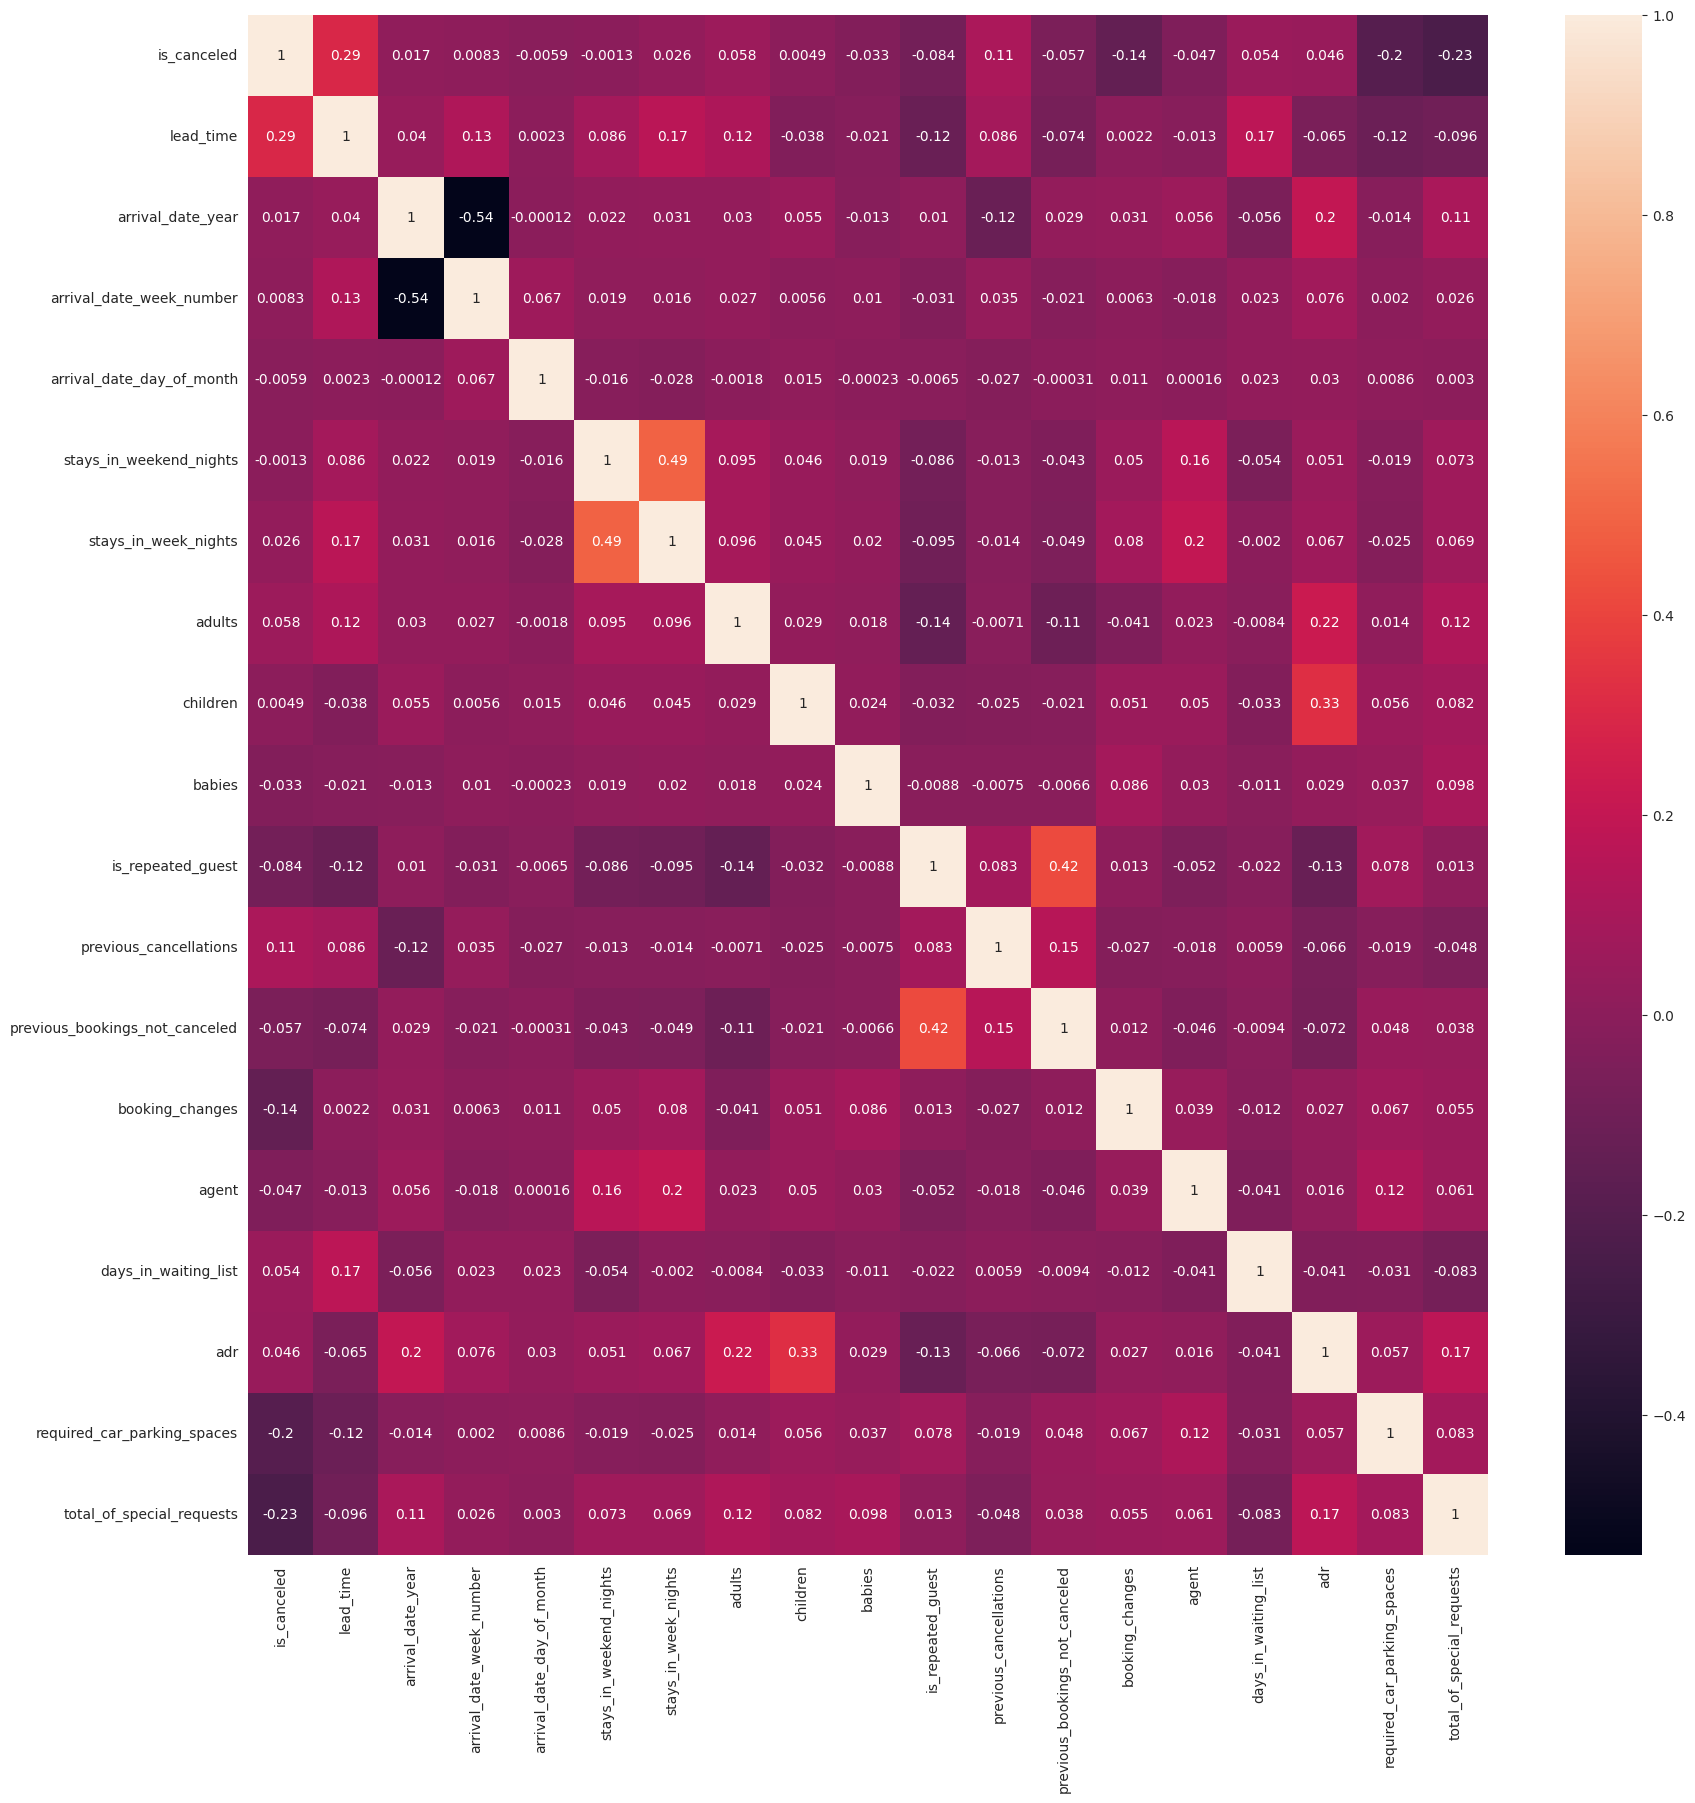

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)

We can see here that there is a strong correlation between several things:

lead_time with is_cancelled
The chance of canceling an order will be much higher for customers who make orders from far in advance because plans that have been planned in advance are more likely to change due to unforeseen events. Another possible reason why customers cancel bookings made in advance (which is often facilitated by the option to do it for free) is due to a sudden change of plans, natural disaster or illness. 2. previous_bookings_not_cancelled with is_repeated

We can conclude from the data contained here that most of the customers who place orders repeatedly do not cancel their previous orders because they are satisfied with the services at the hotel. From this we can see that if we can reduce the cancellation rate on hotel bookings, we will have a higher chance of increasing the number of customers who will make repeat bookings.

**8. Percentage of adults with children who do not**

In [ ]:
adult_only = data[(data['adults'] != 0) & (data['children'] == 0) & (data['babies'] == 0)].sort_values('reserved_room_type')
adult_child = data[(data['adults'] != 0) & (data['children'] != 0) | (data['babies'] != 0)].sort_values('reserved_room_type')


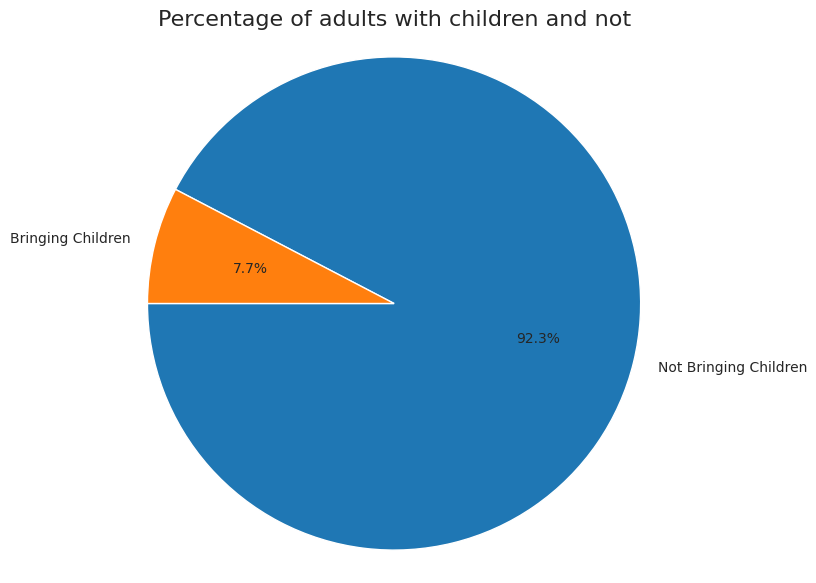

In [ ]:
percentage = [(len(adult_only)/(len(adult_only) + len(adult_child)))*100, (len(adult_child)/(len(adult_only) + len(adult_child)))*100]
labels = 'Not Bringing Children', 'Bringing Children'

f, ax = plt. subplots(figsize=(7,7))
ax.pie(percentage, labels = labels, autopct='%1.1f%%' , startangle = 180)
ax. axis('equal')

ax.set_title('Percentage of adults with children and not', fontsize=16)
plt. show()

**9. How many bookings were canceled?**

From this we can see that more cancellations occurred during the booking process at city hotels than at resort hotels.
This can happen maybe because people who book at resort hotels located in
areas that tend to be quieter and far from cities, it is clear they want a vacation.
This is inversely proportional to the booking process that occurs in city hotels

In [ ]:
total_cancelations = data['is_canceled'].sum()
rh_cancelations = data.loc[data["hotel"] == "Resort Hotel"]["is_canceled"].sum()
ch_cancelations = data.loc[data["hotel"] == "City Hotel"]["is_canceled"].sum()

# mencari persentase
rel_cancel = (total_cancelations / data.shape[0]) * 100
rh_rel_cancel = (rh_cancelations / data.loc[data["hotel"] == "Resort Hotel"].shape[0]) * 100
ch_rel_cancel = (ch_cancelations / data.loc[data["hotel"] == "City Hotel"].shape[0]) * 100

print(f"Many bookings were cancelled: {total_cancelations:} ({rel_cancel:.0f} %)")
print(f"Many resort hotel bookings have been cancelled: {rh_cancelations:} ({rh_rel_cancel:.0f} %)")
print(f"Many City hotel bookings were cancelled: {ch_cancelations:} ({ch_rel_cancel:.0f} %)")

Many bookings were cancelled: 44199 (37 %)
Many resort hotel bookings have been cancelled: 11120 (28 %)
Many City hotel bookings were cancelled: 33079 (42 %)


**10. How many total cancellations per month?**

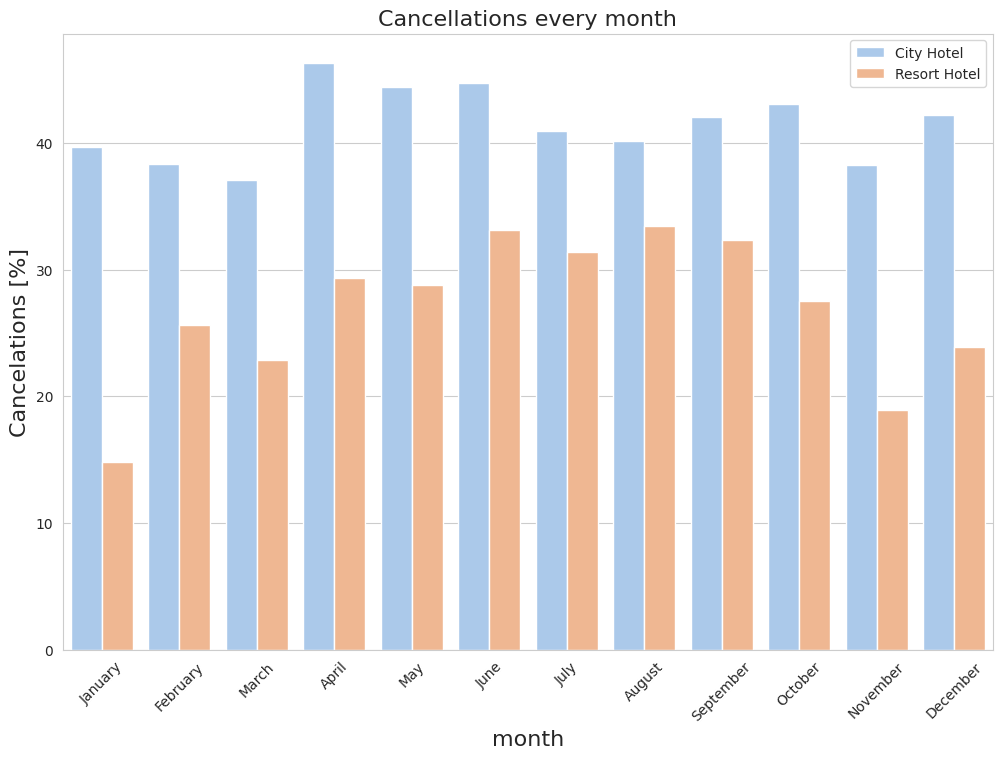

In [ ]:
res_book_per_month = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})

cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

ordered_months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data, palette = 'pastel')
plt.title("Cancellations every month", fontsize=16)
plt.xlabel("month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

**11. Many Cancellations based on market segmentt**

It can be seen from the graph that most cancellations of orders occur at online travel agents because of the ease of ordering and canceling offered by online travel agents. This makes potential customers not think twice about booking a hotel because of the convenience it offers and cancellation fees which are often free. The combination of these things has led to high cancellations of ticket orders through online travel agents.

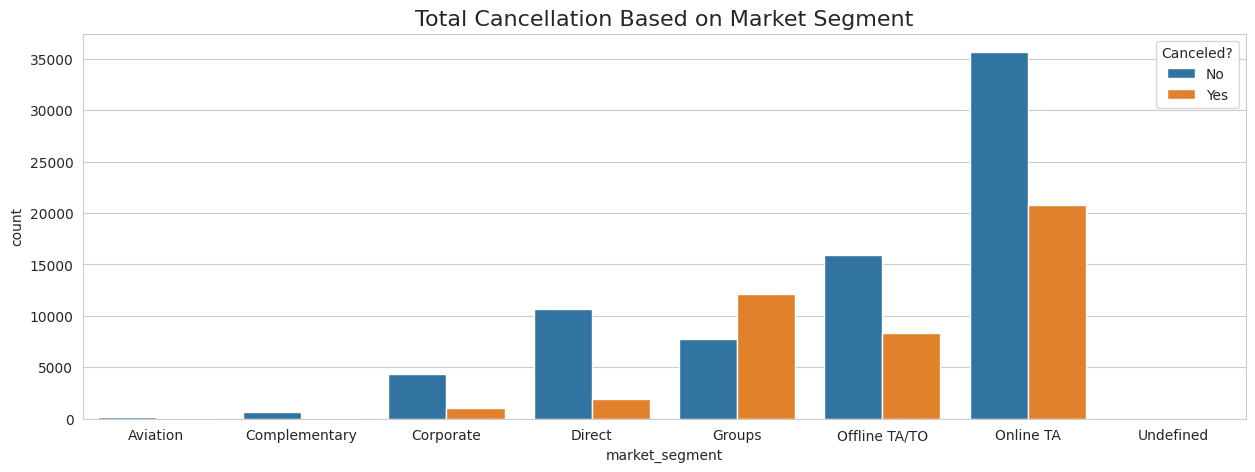

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='market_segment', data=data.sort_values('market_segment'), hue = 'is_canceled')

plt.legend(title='Canceled?', loc='best', labels=['No', 'Yes'])
plt.title('Total Cancellation Based on Market Segment', size = 16)
plt.show()


**12. Distribution of ADRs**

<ipython-input-41-fd390d59bf8e>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='adr', ylabel='Density'>

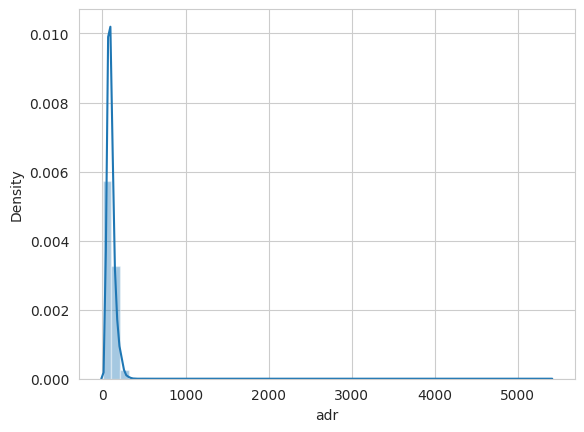

In [ ]:
sns.distplot(data[data['adr'] > 0]['adr'])